In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
#converting species value to numeric value
df["species"] = df["species"].map({"setosa" : 1, "versicolor" : 0})

In [4]:
x_train = df.iloc[:80, :-1]
y_train = df.iloc[:80, -1]
x_test = df.iloc[80:, :-1]
y_test = df.iloc[80:, -1]

In [5]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()


In [6]:
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def compute_cost(x_train, y_train, w, b):
    epsilon = 1e-7
    m,n = x_train.shape
    z = np.dot(x_train, w) + b
    pred = sigmoid(z)
    cost = - 1 / m * np.sum(y_train * np.log(pred + epsilon) + (1 - y_train) * np.log(1 - pred + epsilon))
    return cost
    

In [9]:
def compute_gradient(x_train, y_train, w, b):
    m, n = x_train.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        z_wb = np.dot(x_train[i], w) + b  # Vectorized dot product
        f_wb = sigmoid(z_wb)
        error = f_wb - y_train[i]
        
        dj_db += error  # Accumulate bias gradient
        for j in range(n):
            dj_dw[j] += error * x_train[i, j]  # Accumulate weight gradient

    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


In [10]:
w = np.zeros(x_train.shape[1])
b = 0

In [13]:
def gradient_descent(x_train, y_train, w, b, iterations, learning_rate):
    cost_history = []
    for i in range(iterations):
        dj_db,dj_dw = compute_gradient(x_train, y_train, w, b)
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db
        cost = compute_cost(x_train, y_train, w, b)
        cost_history.append(cost)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost {cost}")

    return w, b, cost_history

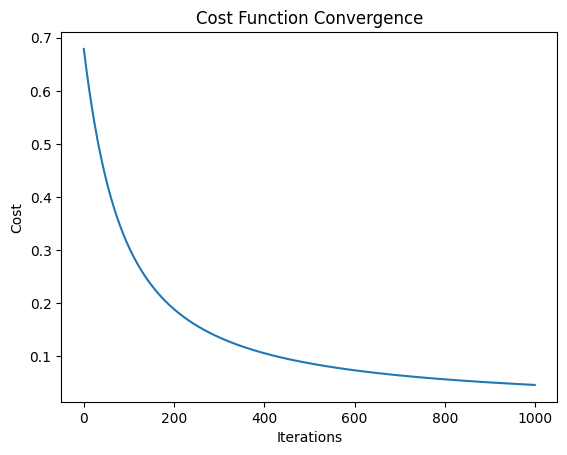

In [19]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [15]:
learning_rate = 0.01
iterations = 1000

w, b, cost_history = gradient_descent(x_train, y_train, w, b, iterations, learning_rate)

Iteration 0: Cost 0.6788677796814879
Iteration 100: Cost 0.30535544218758487
Iteration 200: Cost 0.18864768284511318
Iteration 300: Cost 0.13561414266201446
Iteration 400: Cost 0.10580033702818817
Iteration 500: Cost 0.08678733510249528
Iteration 600: Cost 0.07362657182507991
Iteration 700: Cost 0.06398060960024553
Iteration 800: Cost 0.05660725264108212
Iteration 900: Cost 0.05078695073901274


In [17]:
def predict(x_test, w, b):
    m,n = x_test.shape
    predictions = np.zeros(m)
    for i in range(m):
        z_wb = 0
        z_wb = np.dot(x_test[i],w) +b
        f_wb = sigmoid(z_wb)
        predictions[i] = 1 if f_wb >= 0.5 else 0
        
    return predictions

In [18]:
predictions = predict(x_test, w, b)
print(predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


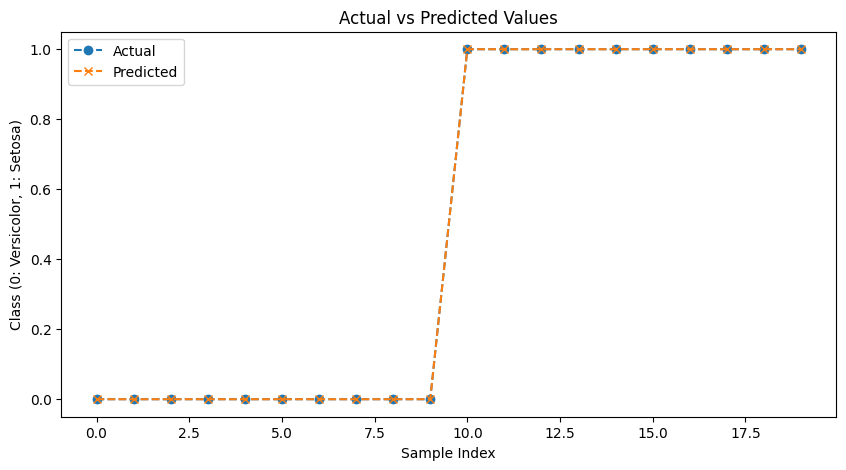

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", marker="o", linestyle="dashed")
plt.plot(predictions, label="Predicted", marker="x", linestyle="dashed")
plt.xlabel("Sample Index")
plt.ylabel("Class (0: Versicolor, 1: Setosa)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
